<a href="https://colab.research.google.com/github/hilya09/phishing-detection/blob/main/train_model_ekaperimen_1_Variabel_Prediktor_Kombinasi_Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing URL Detection

## Modules dan Packages

In [ ]:
import gdown
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.stem import SnowballStemmer

import joblib
import pickle

In [ ]:
# Download the file
!wget https://raw.githubusercontent.com/hilya09/dataset/main/urldataset_new.csv

--2024-05-06 10:25:36--  https://raw.githubusercontent.com/hilya09/dataset/main/urldataset_new.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10404694 (9.9M) [text/plain]
Saving to: ‘urldataset_new.csv’

urldataset_new.csv  100%[===================>]   9.92M  --.-KB/s    in 0.06s   

2024-05-06 10:25:36 (161 MB/s) - ‘urldataset_new.csv’ saved [10404694/10404694]



In [ ]:
data = pd.read_csv("urldataset_new.csv")

## Exploratory Data Analysis (EDA)

In [ ]:
data

,URL,Label
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0
3,https://resicorphome.com/brian/srr/austin/,0
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0
...,...,...
259643,https://www.lovetheedit.com/postnewo/www.dropb...,1
259644,http://www.vg247.com/2017/04/24/best-nintendo-...,0
259645,https://lt.mydplr.com/16672ac75448ecdb528e1c66...,1
259646,http://www.heinzreber.net/homeflash1.html,1


In [ ]:
data.URL[259647]

'http://www.answers.com/Q/What_are_the_sizes_of_computer_memory'

In [ ]:
data['Label'].unique()

array([0, 1])

In [ ]:
print('Total Jumlah url:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [1] Bad\t\t:', data[data.Label == 1].shape[0], 'data')
print('-- [0] Good\t\t:', data[data.Label == 0].shape[0], 'data\n')

Total Jumlah url: 259648 data

terdiri dari (label):
-- [1] Bad		: 153276 data
-- [0] Good		: 106372 data



## Tokenisasi

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
# Tokenizing all the rows
print('Getting words tokenized ...')
t0= time.perf_counter()
data['text_tokenized'] = data.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 2.288908503000016 sec


In [ ]:
data.sample(5)

,URL,Label,text_tokenized
107318,http://www.amazcecm-co-jp.amacaeon.chamitan.top/,0,"[http, www, amazcecm, co, jp, amacaeon, chamit..."
28012,https://www.precision-camera.com,1,"[https, www, precision, camera, com]"
156462,http://clissold.com.au/on/mygovnew/otp2.html,0,"[http, clissold, com, au, on, mygovnew, otp, h..."
41842,https://dutsh-helppackage.ecranul.ro/public/qi...,0,"[https, dutsh, helppackage, ecranul, ro, publi..."
216285,https://www.ci.bellefontaine.oh.us,1,"[https, www, ci, bellefontaine, oh, us]"


In [ ]:
data.text_tokenized[254053]

['http', 'www', 'xyzguyz', 'com', 'admin', 'G', 'Docs', 'index', 'php']

## Stemming

In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
data['text_stemmed'] = data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 19.158569475000036 sec


In [ ]:
data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
233679,http://openseastaking.com,0,"[http, openseastaking, com]","[http, openseastak, com]",http openseastak com
138181,http://www.t.mhnpv.com,0,"[http, www, t, mhnpv, com]","[http, www, t, mhnpv, com]",http www t mhnpv com
254053,http://www.xyzguyz.com/admin1/G.Docs/index.php,1,"[http, www, xyzguyz, com, admin, G, Docs, inde...","[http, www, xyzguyz, com, admin, g, doc, index...",http www xyzguyz com admin g doc index php
98885,http://www.qbaipacx.org,0,"[http, www, qbaipacx, org]","[http, www, qbaipacx, org]",http www qbaipacx org
118034,http://dd365m.com/,0,"[http, dd, m, com]","[http, dd, m, com]",http dd m com


In [ ]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
data['text_sent'] = data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.16389605400001983 sec


In [ ]:
data.text_stemmed[254053]

['http', 'www', 'xyzguyz', 'com', 'admin', 'g', 'doc', 'index', 'php']

In [ ]:
data.text_sent[254053]

'http www xyzguyz com admin g doc index php'

In [ ]:
bad_sites = data[data.Label == 0]
good_sites = data[data.Label == 1]

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0,"[https, pogodasub, com, Ge, I, rd, p, OksK, in...","[https, pogodasub, com, ge, i, rd, p, oksk, in...",https pogodasub com ge i rd p oksk inteligo lo...
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0,"[https, pogodasub, com, Ge, I, rd, Ly, I, Se, ...","[https, pogodasub, com, ge, i, rd, ly, i, se, ...",https pogodasub com ge i rd ly i se ipko login...
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0,"[https, pogodasub, com, Ge, I, rd, hz, hZnA]","[https, pogodasub, com, ge, i, rd, hz, hzna]",https pogodasub com ge i rd hz hzna
3,https://resicorphome.com/brian/srr/austin/,0,"[https, resicorphome, com, brian, srr, austin]","[https, resicorphom, com, brian, srr, austin]",https resicorphom com brian srr austin
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0,"[https, kurier, oplata, com, PzVxLK, l, WdJslU...","[https, kurier, oplata, com, pzvxlk, l, wdjslu...",https kurier oplata com pzvxlk l wdjsludi inte...


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
179,http://www.google.com,1,"[http, www, google, com]","[http, www, googl, com]",http www googl com
180,http://youtube.com,1,"[http, youtube, com]","[http, youtub, com]",http youtub com
181,http://apple.com,1,"[http, apple, com]","[http, appl, com]",http appl com
182,http://play.google.com,1,"[http, play, google, com]","[http, play, googl, com]",http play googl com
183,http://support.google.com,1,"[http, support, google, com]","[http, support, googl, com]",http support googl com


In [ ]:
data.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,https://pogodasub.com/2Ge6I0rd/4p0OksK6-inteli...,0,"[https, pogodasub, com, Ge, I, rd, p, OksK, in...","[https, pogodasub, com, ge, i, rd, p, oksk, in...",https pogodasub com ge i rd p oksk inteligo lo...
1,https://pogodasub.com/2Ge6I0rd/Ly6I98Se-ipko/l...,0,"[https, pogodasub, com, Ge, I, rd, Ly, I, Se, ...","[https, pogodasub, com, ge, i, rd, ly, i, se, ...",https pogodasub com ge i rd ly i se ipko login...
2,https://pogodasub.com/2Ge6I0rd/hz6hZnA,0,"[https, pogodasub, com, Ge, I, rd, hz, hZnA]","[https, pogodasub, com, ge, i, rd, hz, hzna]",https pogodasub com ge i rd hz hzna
3,https://resicorphome.com/brian/srr/austin/,0,"[https, resicorphome, com, brian, srr, austin]","[https, resicorphom, com, brian, srr, austin]",https resicorphom com brian srr austin
4,https://kurier24-oplata.com/PzVxLK7l/WdJslUDi-...,0,"[https, kurier, oplata, com, PzVxLK, l, WdJslU...","[https, kurier, oplata, com, pzvxlk, l, wdjslu...",https kurier oplata com pzvxlk l wdjsludi inte...


## Ekstraksi fitur menjadi sebuah matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
print(list(cv.vocabulary_)[:10])

['https', 'pogodasub', 'com', 'ge', 'rd', 'oksk', 'inteligo', 'login', 'php', 'pid']


In [ ]:
feature[254053].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
with open('feature.pickle', 'wb') as output:
  pickle.dump(feature, output)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def train_test_model(model, X, y, training_percentage) :
    trainX, testX, trainY, testY = train_test_split(X, y, test_size=1-training_percentage, stratify=y, random_state=42)
    model.fit(trainX, trainY)
    predY = model.predict(testX)
    accuracy = accuracy_score(testY, predY)
    precision = precision_score(testY, predY, pos_label=1)
    recall = recall_score(testY, predY, pos_label=1)
    f1 = f1_score(testY, predY, pos_label=1)
    return accuracy, precision, recall, f1

In [ ]:
training_sizes = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
def model_results(model) :
    results = []
    for p in training_sizes :
        results.append(train_test_model(model, feature, data.Label, p))
    return pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1Score'])

In [ ]:
logreg_results = model_results(logreg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
models = ['Logistic Regression']
model_results = [logreg_results]

In [ ]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
for model in model_results :
    accuracies.append(model.Accuracy.values)
    precisions.append(model.Precision.values)
    recalls.append(model.Recall.values)
    f1_scores.append(model.F1Score.values)

In [ ]:
accuracies = pd.DataFrame(np.transpose(accuracies), columns=models, index=training_sizes*100)
precisions = pd.DataFrame(np.transpose(precisions), columns=models, index=training_sizes*100)
recalls = pd.DataFrame(np.transpose(recalls), columns=models, index=training_sizes*100)
f1_scores = pd.DataFrame(np.transpose(f1_scores), columns=models, index=training_sizes*100)

In [ ]:
accuracies

,Logistic Regression
10.0,0.908030
20.0,0.910263
30.0,0.912536
40.0,0.913441
50.0,0.914315
60.0,0.914760
70.0,0.916259
80.0,0.915713
90.0,0.916426


In [ ]:
precisions

,Logistic Regression
10.0,0.922580
20.0,0.923800
30.0,0.926184
40.0,0.926792
50.0,0.927872
60.0,0.928789
70.0,0.930673
80.0,0.928120
90.0,0.931184


In [ ]:
recalls

,Logistic Regression
10.0,0.921536
20.0,0.924222
30.0,0.925606
40.0,0.926560
50.0,0.926903
60.0,0.926653
70.0,0.927212
80.0,0.929180
90.0,0.926931


In [ ]:
f1_scores

,Logistic Regression
10.0,0.922058
20.0,0.924011
30.0,0.925895
40.0,0.926676
50.0,0.927387
60.0,0.927719
70.0,0.928939
80.0,0.928649
90.0,0.929053


Text(0, 0.5, 'Accuracies')

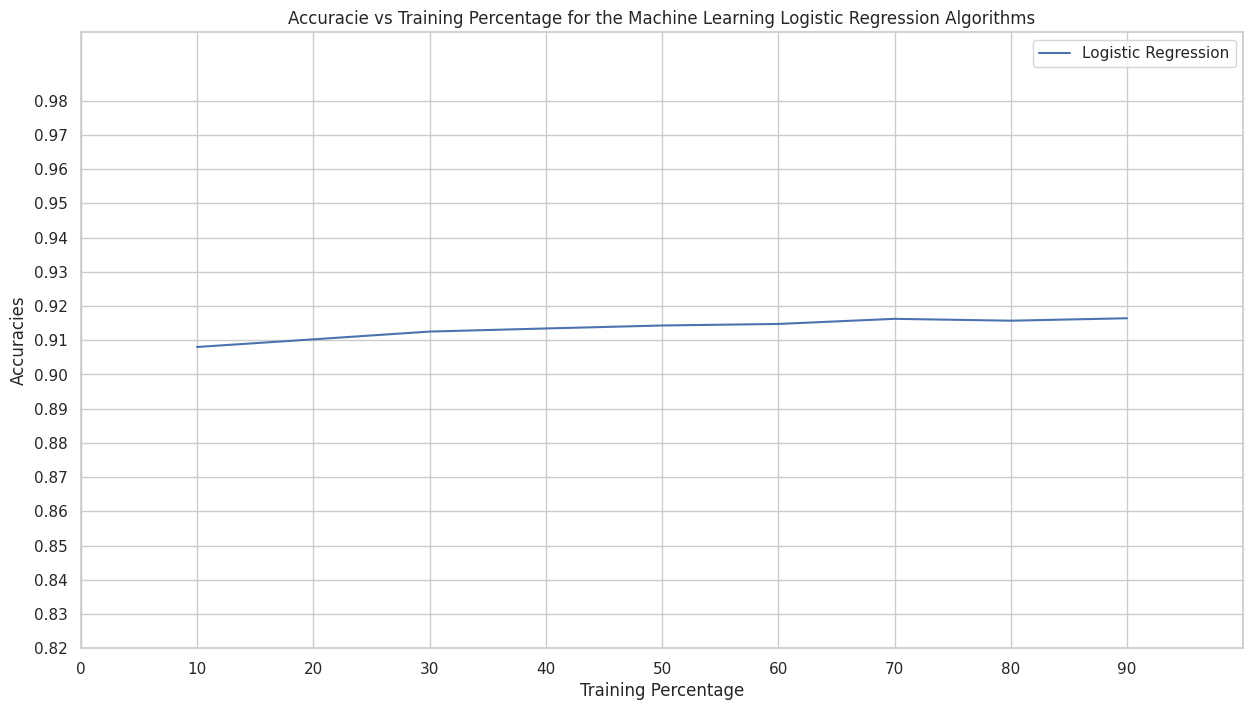

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = accuracies)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("Accuracie vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Accuracies")

Text(0, 0.5, 'Precisions')

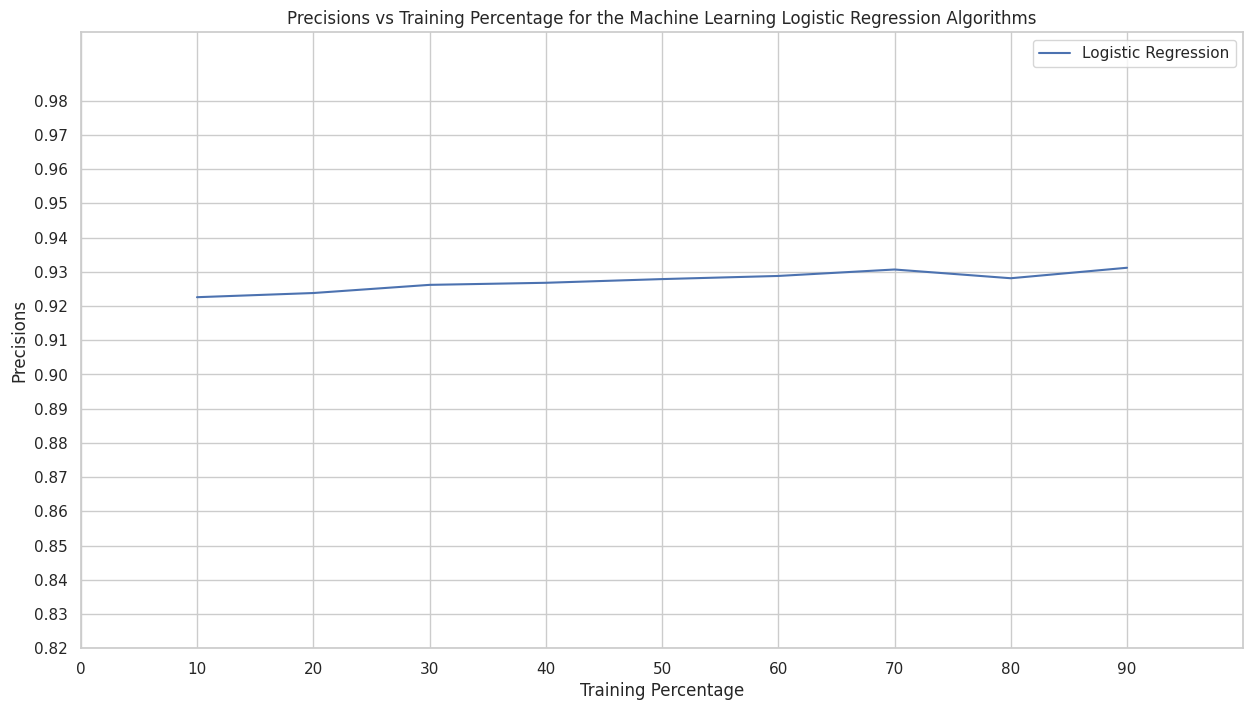

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = precisions)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("Precisions vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Precisions")

Text(0, 0.5, 'Recall')

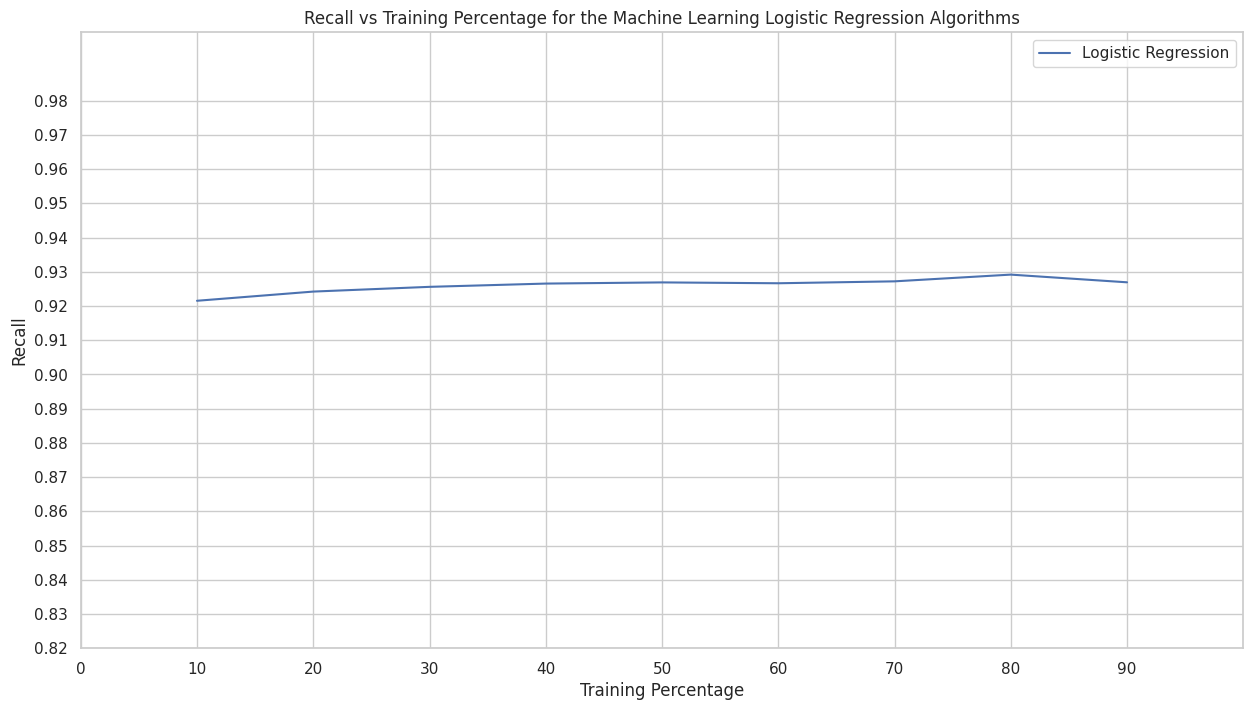

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = recalls)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("Recall vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("Recall")

Text(0, 0.5, 'F1-Score')

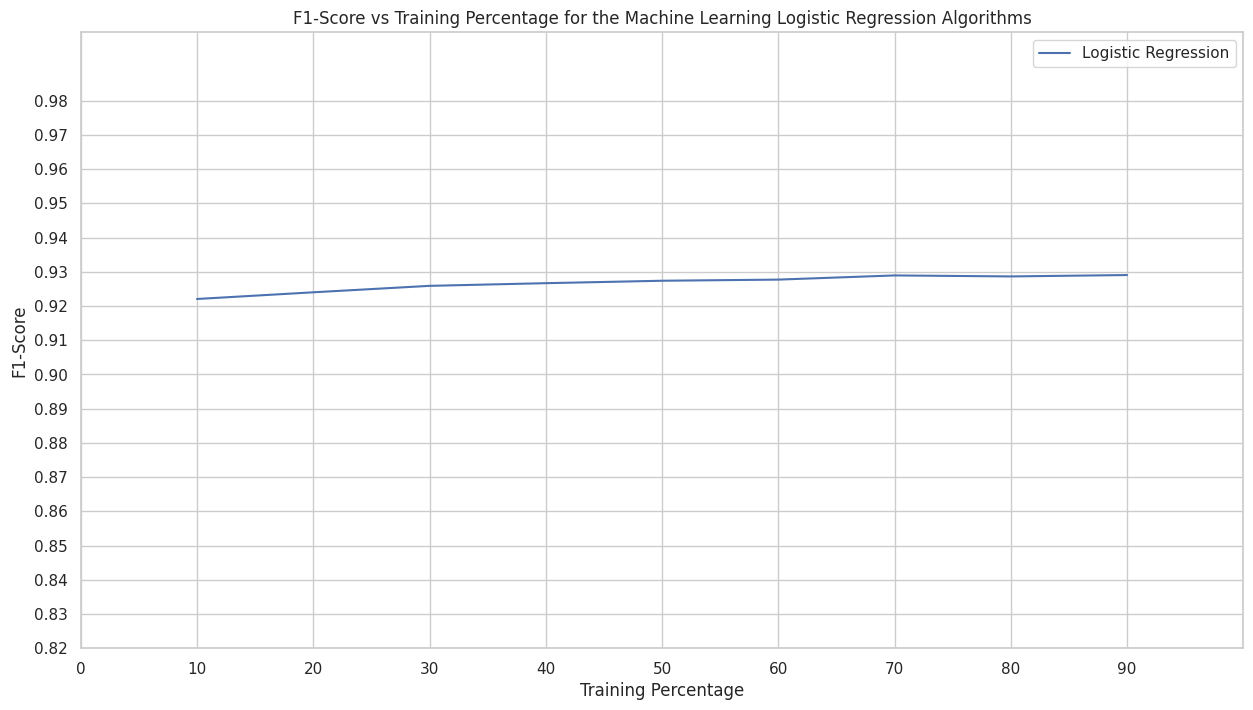

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style('whitegrid')
g = sns.lineplot(data = f1_scores)
g.set(xlim = (0,100), ylim = (0.9,1), xticks = np.arange(0, 100, 10), yticks = np.arange(0.82, 0.98, 0.01))
g.set_title("F1-Score vs Training Percentage for the Machine Learning Logistic Regression Algorithms")
g.set_xlabel("Training Percentage")
g.set_ylabel("F1-Score")

### Make Sklearn Pipeline Using Logistic Regression

In [ ]:
# from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Inisialisasi tokenizer dan stemmer
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
stemmer = SnowballStemmer('english')

# Fungsi untuk melakukan stemming pada setiap kata dalam teks
def stem_tokens(tokens, stemmer):
    return [stemmer.stem(token) for token in tokens]

# Fungsi untuk melakukan tokenisasi dan stemming pada teks
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return stem_tokens(tokens, stemmer)

# Membuat pipeline dengan CountVectorizer dan LogisticRegression
pipeline_ls = make_pipeline(CountVectorizer(tokenizer=tokenize), LogisticRegression())

In [ ]:
trainX, testX, trainY, testY = train_test_split(data.URL, data.Label, test_size=0.2, random_state=42)

In [ ]:
trainX.shape

(207718,)

In [ ]:
testX.shape

(51930,)

In [ ]:
pipeline_ls.fit(trainX,trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function tokenize at 0x790f36ffb880>)),
                ('logisticregression', LogisticRegression())])

Training Accuracy : 0.9327164713698379
Testing Accuracy : 0.9159060273445022

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.90      0.89      0.90     21399
           0       0.93      0.93      0.93     30531

    accuracy                           0.92     51930
   macro avg       0.91      0.91      0.91     51930
weighted avg       0.92      0.92      0.92     51930


CONFUSION MATRIX


<Axes: >

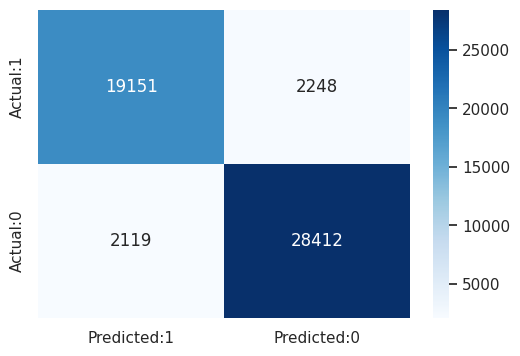

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:1', 'Predicted:0'],
            index = ['Actual:1', 'Actual:0'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['1','0']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='g',cmap="Blues")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Definisikan jumlah fold dan metrik evaluasi
k = 10
scoring = 'accuracy'  # Misalnya, menggunakan akurasi sebagai metrik evaluasi

# Inisialisasi KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lakukan K-Fold Cross Validation
scores = cross_val_score(pipeline_ls, data.URL, data.Label, cv=kf, scoring=scoring)

# Tampilkan hasil evaluasi
print("Hasil K-Fold Cross Validation:")
print("Akurasi: {:.3f}%".format(scores.mean() * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed t

Hasil K-Fold Cross Validation:
Akurasi: 91.463%


### Save Model Logistic Regression

In [ ]:
joblib.dump((pipeline_ls), "model_phishing_lr.model")

['model_phishing_lr.model']

In [ ]:
# from joblib import load
from joblib import load
loaded_model = load('model_phishing_lr.model')
result = loaded_model.score(testX,testY)
print(result)

0.9159060273445022


## Try to Predict

In [ ]:
predict_0 = ['https://www.petanikode.com/kategori/web',
                'https://www.w3schools.com/js/',
                'https://chat.openai.com/',
                'https://www.dicoding.com/academies/',
                'https://digitalservice.jabarprov.go.id/',
                'https://www.domain.com/domains/new-domain-extensions?psafe_param=1&utm_campaign=dynamic_PPC&utm_source=googleads&utm_medium=genericsearch&channelid=P13C46098636S570N0B5578A30D4499E0000V111&gad_source=1&gclid=Cj0KCQjwn7mwBhCiARIsAGoxjaJGe0NjJ8pbQXsFojPkzgIftifxu6sIolAyJ47-aRJ3_0rqYzC-aEcaAutcEALw_wcB&gclsrc=aw.ds',
                'https://www.malasngoding.com/belajar-html/',
                'https://www.upi.edu/',
                'https://www.djkn.kemenkeu.go.id/kpknl-purwakarta/baca-artikel/14851/Waspada-Kehajatan-Phising-Mengintai-Anda.html',
                'https://www.kominfo.go.id/content/detail/29633/siaran-pers-no-118hmkominfo092020-tentang-waspada-kejahatan-siber-kominfo-imbau-jangan-bagikan-kode-rahasiaotp-fraud/0/siaran_pers'
]

predict_1 = ['https://bit.ly/3Bspxxx',
                'https://facebook.login.com',
                'http://store.apple.com.blogspot.com.',
                'https://prakerja.vip',
                'http://www.adidas-shoes.club',
                'http://kuota-gratis.cf',
                'https://forms.aweber.com/form/11/995940911.htm',
               'https://bantuan-1.b-cdn.net/?v=cekbansos/',
               'https://einfowhatee.xyz/i/Nationalday/?show=1"',
               'https://sew.arboretopark.com/w3dd2/app/login.php.'
]
loaded_model = joblib.load('model_phishing_lr.model')

result_1 = loaded_model.predict(predict_1)
result_0 = loaded_model.predict(predict_0)

print(result_1)
print("*"*9)
print(result_0)


[0 1 0 0 0 0 1 0 0 0]
*********
[1 1 1 1 1 0 1 1 1 1]


In [ ]:
from joblib import load
loaded_model = load('model_phishing_lr.model')

predict_bad = []
predict_good = []


while True:
    url = input("Masukkan URL (atau tekan Enter untuk keluar): ")
    if not url:
        break

    import pickle

    result = loaded_model.predict([url])
    print(result)

Masukkan URL (atau tekan Enter untuk keluar): https://sfr-suivi-client.com/login.php
[1]
Masukkan URL (atau tekan Enter untuk keluar): http://sfr-suivi-client.com/
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://sandiko.space/pl/millenium/login/
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://ctem.communityocean.eu/ff
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://brt.bruschetteriabologna.it/auth/wd=brt...
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://zkj4s.app.link/e/84Gw4GGK8Hb
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://aruustali.com/Ar/areautenti/login.php
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://atualizacao.atucad.com/caixatem.php
[1]
Masukkan URL (atau tekan Enter untuk keluar): http://shopeecncb.com
[0]
Masukkan URL (atau tekan Enter untuk keluar): https://colab.research.google.com/drive/1jm9nHuJor4sn3LBD8a9JmeqSGsXWbr5T#scrollTo=165b707f
[1]
Masukkan URL (atau tekan Enter untuk keluar): https://3sxpeqr41v

## Word Cloud

In [ ]:
pip install wordcloud

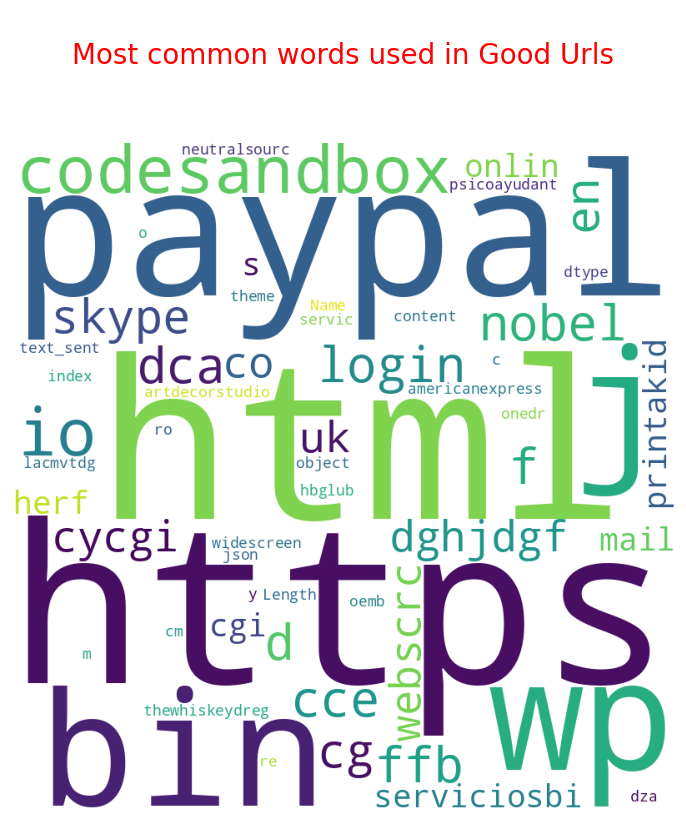

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator

combined_1_2_5_6 = good_sites.text_sent
combined_1_2_5_6.reset_index(drop=True, inplace=True)
text = str(combined_1_2_5_6)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', max_words = 400, min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("\nMost common words used in Good Urls\n\n", fontdict={'size': 20, 'color': 'red', 'verticalalignment': 'bottom'})
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

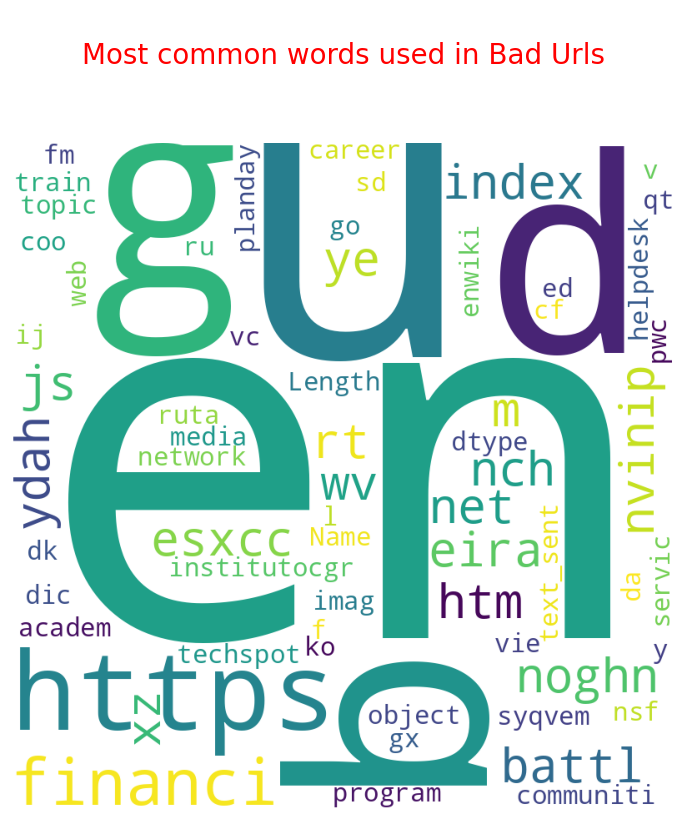

In [ ]:
combined_1_2_5_6 = bad_sites.text_sent
combined_1_2_5_6.reset_index(drop=True, inplace=True)
text = str(combined_1_2_5_6)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', max_words = 400, min_font_size = 10).generate(text)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title("\nMost common words used in Bad Urls\n\n", fontdict={'size': 20, 'color': 'red', 'verticalalignment': 'bottom'})
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()